In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, join

In [3]:
phz = Table.read('/home/aalvarez/Downloads/test PHZ_CAT/EUC_PHZ_PHZCAT__20201118T120550.792001Z_00.00.fits')

In [4]:
mer = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/data/EUC_MER_FINAL-CAT_TILE40012-FC72AF_20200804T004459.212506Z_00.00.fits')

In [51]:
ref = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/data/EUC_PHZ_REFPHOT__20200910T050620.214530Z_00.00.fits', hdu=1)

In [54]:
mer.colnames

['OBJECT_ID',
 'RIGHT_ASCENSION',
 'DECLINATION',
 'SEGMENTATION_MAP_ID',
 'VIS_DET',
 'FLUX_G_EXT_DECAM_APER',
 'FLUX_R_EXT_DECAM_APER',
 'FLUX_I_EXT_DECAM_APER',
 'FLUX_Z_EXT_DECAM_APER',
 'FLUX_U_EXT_OMEGACAM_APER',
 'FLUX_G_EXT_OMEGACAM_APER',
 'FLUX_R_EXT_OMEGACAM_APER',
 'FLUX_I_EXT_OMEGACAM_APER',
 'FLUX_U_EXT_LSST_APER',
 'FLUX_G_EXT_LSST_APER',
 'FLUX_R_EXT_LSST_APER',
 'FLUX_I_EXT_LSST_APER',
 'FLUX_Z_EXT_LSST_APER',
 'FLUX_VIS_APER',
 'FLUX_Y_APER',
 'FLUX_J_APER',
 'FLUX_H_APER',
 'FLUXERR_G_EXT_DECAM_APER',
 'FLUXERR_R_EXT_DECAM_APER',
 'FLUXERR_I_EXT_DECAM_APER',
 'FLUXERR_Z_EXT_DECAM_APER',
 'FLUXERR_U_EXT_OMEGACAM_APER',
 'FLUXERR_G_EXT_OMEGACAM_APER',
 'FLUXERR_R_EXT_OMEGACAM_APER',
 'FLUXERR_I_EXT_OMEGACAM_APER',
 'FLUXERR_U_EXT_LSST_APER',
 'FLUXERR_G_EXT_LSST_APER',
 'FLUXERR_R_EXT_LSST_APER',
 'FLUXERR_I_EXT_LSST_APER',
 'FLUXERR_Z_EXT_LSST_APER',
 'FLUXERR_VIS_APER',
 'FLUXERR_Y_APER',
 'FLUXERR_J_APER',
 'FLUXERR_H_APER',
 'FLUX_NIR_STACK_APER',
 'FLUXERR_NIR_STA

In [11]:
weirdos = phz[np.isnan(phz['PHZ_PDF'].sum(axis=1))]

In [12]:
selection = join(mer, weirdos, 'OBJECT_ID')

In [72]:
bands = [
    ('lsst/u', 'FLUX_U_EXT_LSST_APER'),
    ('lsst/g', 'FLUX_G_EXT_LSST_APER'),
    ('lsst/r', 'FLUX_R_EXT_LSST_APER'),
    ('lsst/i', 'FLUX_I_EXT_LSST_APER'),
    ('lsst/z', 'FLUX_Z_EXT_LSST_APER'),
    ('euclid/VIS', 'FLUX_DETECTION_TOTAL'),
    ('euclid/Y', 'FLUX_Y_APER'),
    ('euclid/H', 'FLUX_H_APER'),
    ('euclid/J', 'FLUX_J_APER')
]

In [73]:
mer_sample = mer[np.random.choice(len(mer), 1000)]
ref_sample = ref[np.random.choice(len(ref), 5000)]

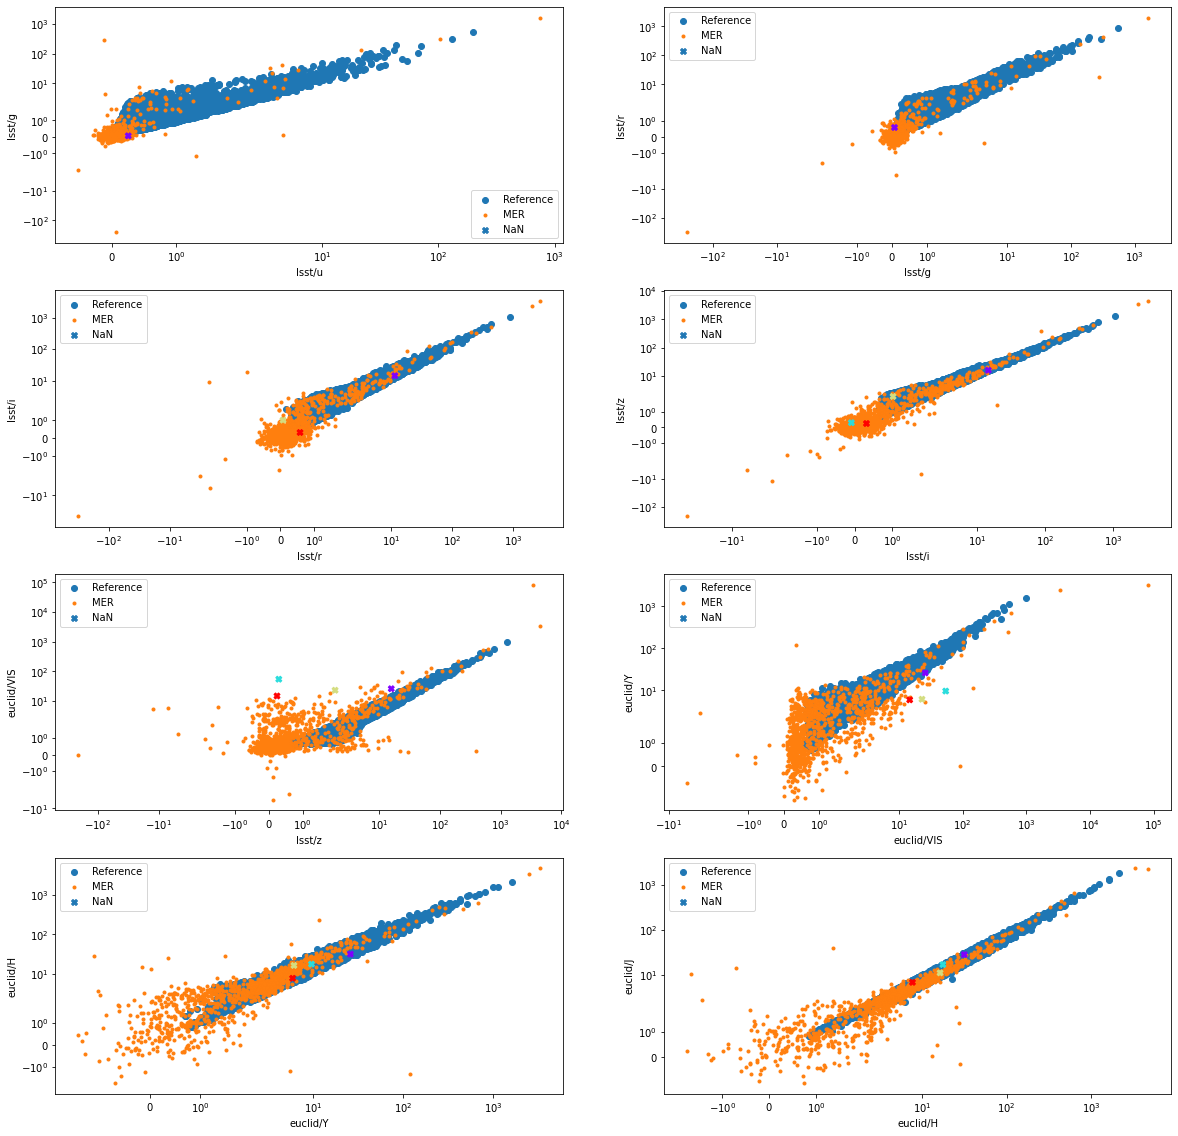

In [74]:
ncols = 2
nrows = (len(bands) - 1) // ncols

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20))

for ba, bb, ax in zip(bands[:-1], bands[1:], axes.ravel()):
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_xlabel(ba[0])
    ax.set_ylabel(bb[0])
    ax.scatter(ref_sample[ba[0]], ref_sample[bb[0]], marker='o', label='Reference')
    ax.scatter(mer_sample[ba[1]], mer_sample[bb[1]], marker='.', label='MER')
    ax.scatter(selection[ba[1]], selection[bb[1]], marker='X', c=np.arange(len(selection)), cmap='rainbow', label='NaN')
    ax.legend()